# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight ==  0.1.11

For more information, please contact me: dingxuheng@126.com

This notebook is almost identical to the 'galight_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


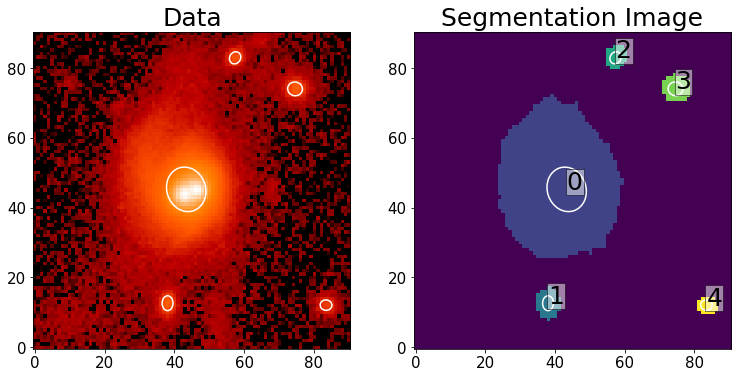

Input directly the a obj that used to create MASK, use space between each id:
2 4
The negative PSF values are corrected as 0 values.
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


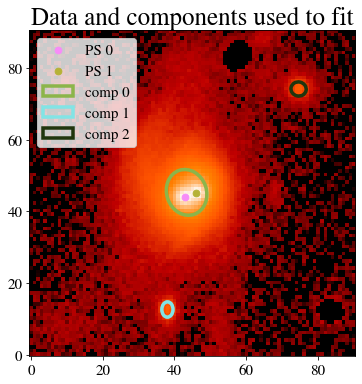

In [3]:
#%%Start to produce the class and params for lens fitting.
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-6.062513711509389 reduced X^2 of best position
-24741.118456669818 log likelihood
8162.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 1.666719925012341, 'n_sersic': 1.433834796310788, 'e1': -0.10565541325912729, 'e2': -0.030842151665881123, 'center_x': 0.10031997548875442, 'center_y': -0.015132926863158752}, {'amp': 1, 'R_sersic': 0.32492738781044156, 'n_sersic': 0.7323319863433478, 'e1': -0.20319483086897802, 'e2': -0.2616198439119356, 'center_x': 1.1183702879726565, 'center_y': -5.514730692465697}, {'amp': 1, 'R_sersic': 0.20052044438778813, 'n_sersic': 0.5829908291577677, 'e1': -0.0985266310102326, 'e2': 0.05375955615605747, 'center_x': -4.99625481145629, 'center_y': 4.905802129435958}] lens light result
[{'ra_image': array([0.38393196]), 'dec_image': array([-0.21582962]), 'point_amp': array([1.])}, {'ra_image': array([-0.21660288]), 'dec_image': array([-0.00522178]), 'p

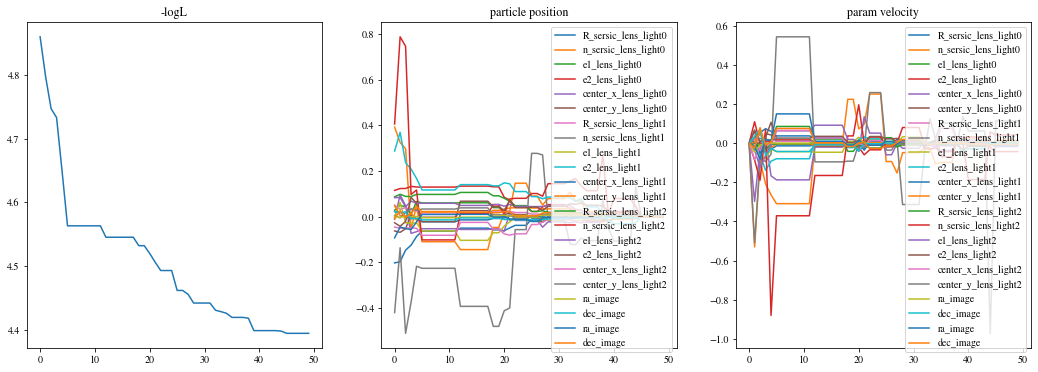

<Figure size 432x288 with 0 Axes>

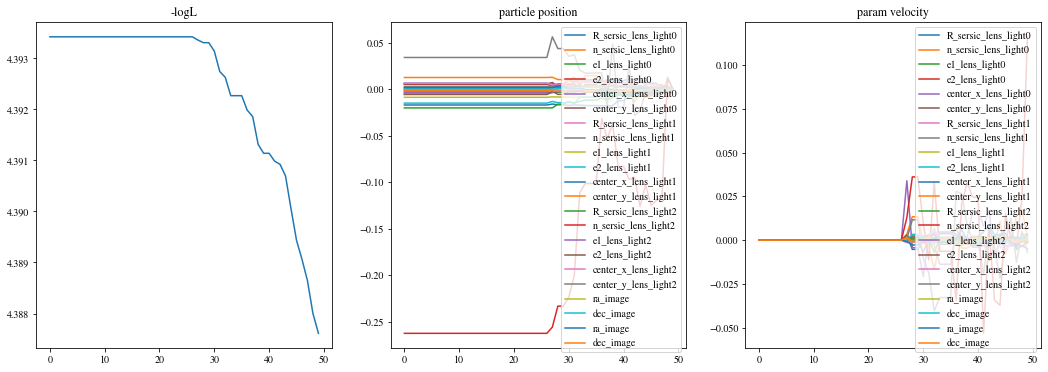

<Figure size 432x288 with 0 Axes>

-5.954920032636551 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  5.954920032636551


/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:533: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


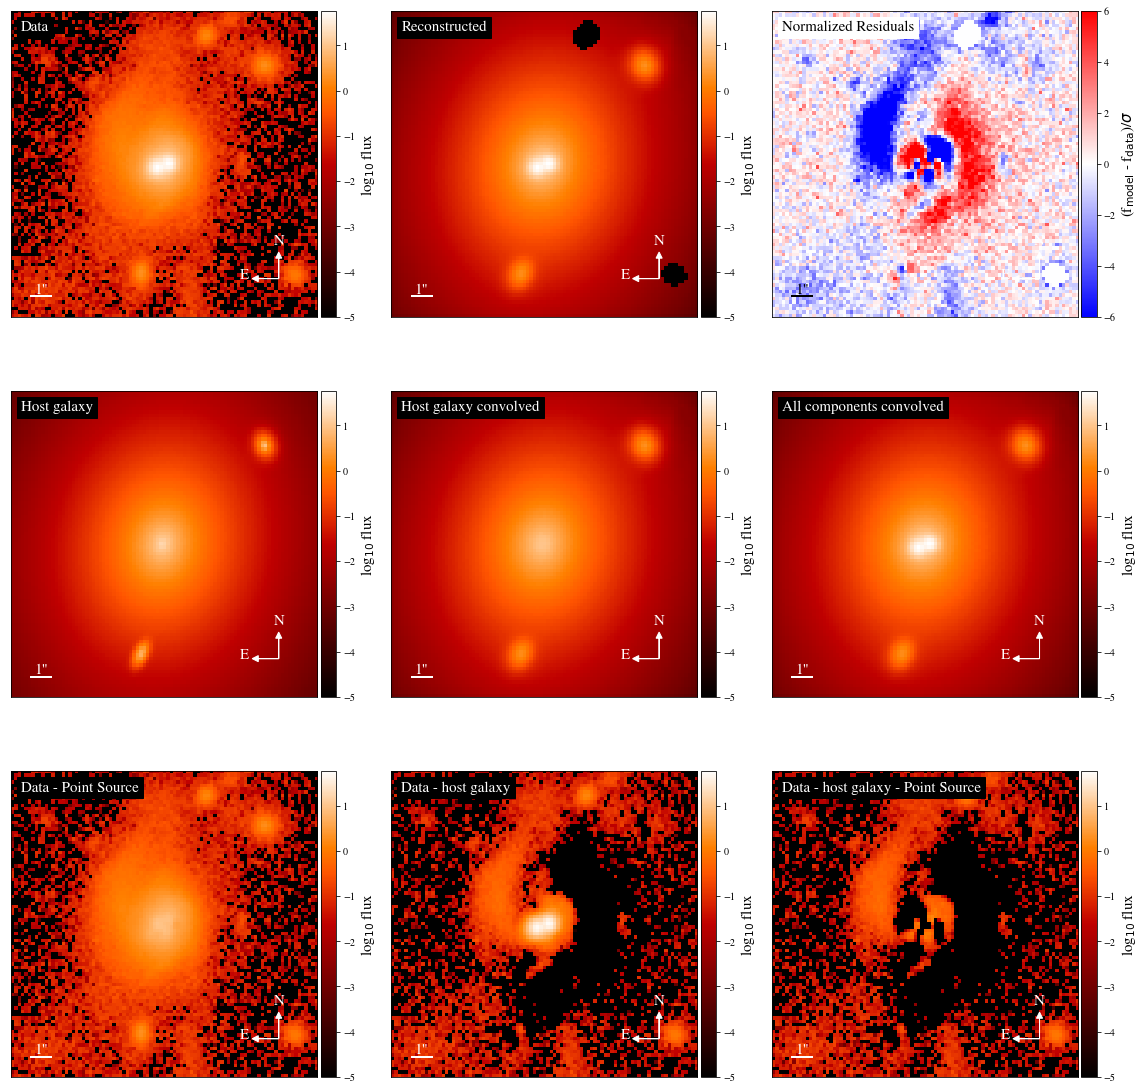

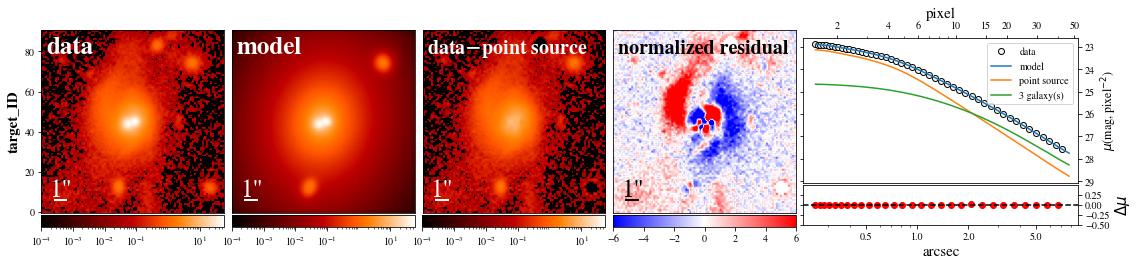

In [4]:
#%%Setting the fitting method and run.
from galight.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 65.70486978512078,
  'R_sersic': 1.6345705124107366,
  'n_sersic': 1.43640216814435,
  'e1': -0.10061002023959209,
  'e2': -0.0379919427897495,
  'center_x': 0.1046502171067006,
  'center_y': -0.021697630421823825,
  'phi_G': -1.3902652855117026,
  'q': 0.8057969379259541,
  'flux_sersic_model': 1983.3309280536769,
  'flux_within_frame': 1964.838635298651,
  'magnitude': 18.766682776932562},
 {'amp': 72.72901561086375,
  'R_sersic': 0.32677018321817103,
  'n_sersic': 0.6712671255865971,
  'e1': -0.19991598791100046,
  'e2': -0.2462700448256497,
  'center_x': 1.1590145083956096,
  'center_y': -5.461189676839032,
  'phi_G': -1.1263381600429934,
  'q': 0.5183732184946651,
  'flux_sersic_model': 1983.3309280536769,
  'flux_within_frame': 40.91691495199837,
  'magnitude': 22.970242796504778},
 {'amp': 80.40852270581028,
  'R_sersic': 0.22481862341734601,
  'n_sersic': 1.2760168638277618,
  'e1': -0.09647131469421225,
  'e2': 0.059188801125496265,
  'center_x': -4.977874927232333,
 